In [ ]:
import os
import random
import shutil
import matplotlib.pyplot as plt

import random
random.seed(42)

# Paths
images_path = "../data/processed/images"
labels_path = "../data/processed/labels"

output_base = "../data/yolo"
train_images = os.path.join(output_base, "images/train")
val_images = os.path.join(output_base, "images/val")
train_labels = os.path.join(output_base, "labels/train")
val_labels = os.path.join(output_base, "labels/val")

# Crear carpetas destino
for path in [train_images, val_images, train_labels, val_labels]:
    os.makedirs(path, exist_ok=True)

# Obtener lista de imágenes
image_files = [f for f in os.listdir(images_path) if f.endswith(".jpg") or f.endswith(".png")]
random.shuffle(image_files)

# Split 80-20
split_idx = int(len(image_files) * 0.8)
train_files = image_files[:split_idx]
val_files = image_files[split_idx:]

# Función para mover imágenes y labels
def move_files(files, img_dest, label_dest):
    for img_file in files:
        label_file = os.path.splitext(img_file)[0] + ".txt"
        
        shutil.copy(os.path.join(images_path, img_file), os.path.join(img_dest, img_file))
        shutil.copy(os.path.join(labels_path, label_file), os.path.join(label_dest, label_file))

# Mover train y val
move_files(train_files, train_images, train_labels)
move_files(val_files, val_images, val_labels)

print("Dataset dividido en train y val con estructura YOLO.")


Dataset dividido en train y val con estructura YOLO.


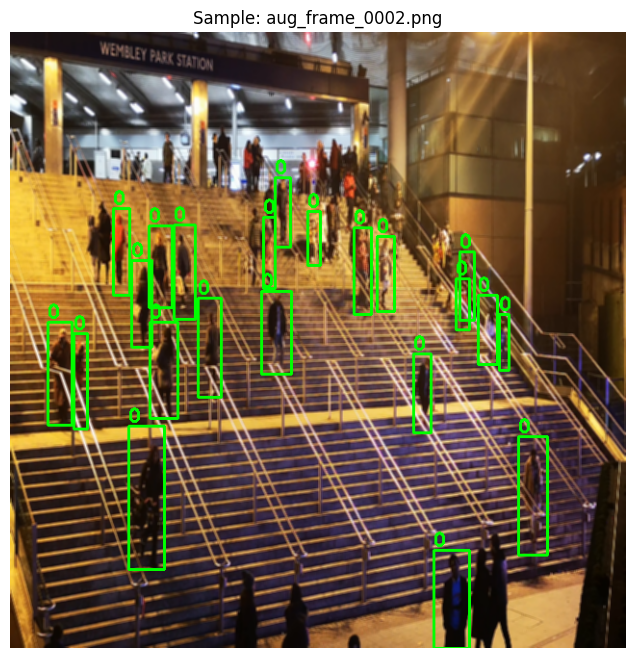

In [8]:
import os
import cv2
import random
import matplotlib.pyplot as plt


# 📌 Paths
train_images_path = "../data/yolo/images/train"
train_labels_path = "../data/yolo/labels/train"

# Listar imágenes
image_files = [f for f in os.listdir(train_images_path) if f.endswith(".png")]

# Tomar una imagen aleatoria
random.seed(42)  # Reproducible
sample_img_name = random.choice(image_files)

# Cargar imagen
img_path = os.path.join(train_images_path, sample_img_name)
img = cv2.imread(img_path)

# Cargar labels (YOLO format)
label_path = os.path.join(train_labels_path, sample_img_name.replace(".png", ".txt"))
with open(label_path, "r") as f:
    annotations = f.readlines()

# Dibujar bounding boxes
h, w, _ = img.shape
for ann in annotations:
    cls, x_center, y_center, bw, bh = map(float, ann.split())
    # Convertir coordenadas YOLO -> pixeles
    x_center *= w
    y_center *= h
    bw *= w
    bh *= h
    x1 = int(x_center - bw / 2)
    y1 = int(y_center - bh / 2)
    x2 = int(x_center + bw / 2)
    y2 = int(y_center + bh / 2)
    
    cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
    cv2.putText(img, str(int(cls)), (x1, y1 - 5), cv2.FONT_HERSHEY_SIMPLEX, 
                0.6, (0, 255, 0), 2)

# Convertir BGR a RGB para matplotlib
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Mostrar inline
plt.figure(figsize=(8, 8))
plt.imshow(img_rgb)
plt.axis("off")
plt.title(f"Sample: {sample_img_name}")
plt.show()

In [ ]:
from ultralytics import YOLO

# Cargar modelo pequeño para validación
model = YOLO("yolov8n.pt") #yolov8n: modelo nano

# Validar dataset (epochs=0 -> no entrena, solo verifica)
model.train(
    data="../data/data.yaml",  # ruta a tu yaml
    epochs=0,
    imgsz=640
)

#Alternativa para verificar en bash
#yolo val model=yolov8n.pt data=../data/data.yaml imgsz=640